## Get Requirements

In [1]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim as optim
import numpy as np
import matplotlib.pyplot as plt
import h5py
#import helpers
import numpy as np
from pathlib import Path
import torch
from torch.utils import data
# import cv2
import math
from PIL import Image
import random
from torch.utils.data import Dataset, DataLoader
import time
import glob
import scipy.signal
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
print(torch.__version__)


from datasets.sleep_edf import split_data, SleepEDF_MultiChan_Dataset, SleepEDF_Seq_MultiChan_Dataset
from models.epoch_cmt import Epoch_Cross_Transformer_Network
from models.sequence_cmt import Seq_Cross_Transformer_Network 
from utils.metrics import accuracy, kappa, g_mean, plot_confusion_matrix, confusion_matrix, AverageMeter 

/home/jovyan/conda-envs/sleep_monitoring/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.10.0


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device 
project_path = "mmsm/Experiments/testing"
if not os.path.isdir(project_path):
        os.makedirs(project_path)
        print(f"Project directory created at {project_path}")

Project directory created at mmsm/Experiments/testing


### Neptune (Ignore this block)

In [4]:
is_neptune = False
if is_neptune:
    import neptune.new as neptune

    run = neptune.init(
        project="jathurshan0330/V2-Cros",
        api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJmYmRmNjE0Zi0xMDRkLTRlNzUtYmIxNi03NzM2ODBlZDc5NTMifQ==",
    )  # your credentials

In [5]:
 if is_neptune:
    experiment = "V2-Cros-76"   #Change This
    !mkdir "/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/V2-Cros-76"  # Change This

## Data

In [6]:
train_data_list = [0,1,2,3]  
val_data_list = [4]  
path = "/home/mmsm/Sleep_EDF_Dataset"

eeg_list = glob.glob(f'{path}/x*.h5')
eeg_list.sort()
[train_eeg_list, val_eeg_list] = split_data(eeg_list,train_data_list,val_data_list)
print(train_eeg_list)
print(val_eeg_list)

mean_eeg_list = glob.glob(f'{path}/mean*.h5')
mean_eeg_list.sort()
[train_mean_eeg_list, val_mean_eeg_list] = split_data(mean_eeg_list,train_data_list,val_data_list)
print(train_mean_eeg_list)
print(val_mean_eeg_list)

sd_eeg_list = glob.glob(f'{path}/std*.h5')
sd_eeg_list.sort()
[train_sd_eeg_list, val_sd_eeg_list] = split_data(sd_eeg_list,train_data_list,val_data_list)
print(train_sd_eeg_list)
print(val_sd_eeg_list)

#########################################################################################################################

eog_list = glob.glob(f'{path}/eog*.h5')
eog_list.sort()
[train_eog_list, val_eog_list] = split_data(eog_list,train_data_list,val_data_list)
print(train_eog_list)
print(val_eog_list)

mean_eog_list = glob.glob(f'{path}/eog_m*.h5')
mean_eog_list.sort()
[train_mean_eog_list, val_mean_eog_list] = split_data(mean_eog_list,train_data_list,val_data_list)
print(train_mean_eog_list)
print(val_mean_eog_list)

sd_eog_list = glob.glob(f'{path}/eog_s*.h5')
sd_eog_list.sort()
[train_sd_eog_list, val_sd_eog_list] = split_data(sd_eog_list,train_data_list,val_data_list)
print(train_sd_eog_list)
print(val_sd_eog_list)



eeg2_list = glob.glob(f'{path}/eeg*.h5')
eeg2_list.sort()
[train_eeg2_list, val_eeg2_list] = split_data(eeg2_list,train_data_list,val_data_list)
print(train_eeg2_list)
print(val_eeg2_list)

mean_eeg2_list = glob.glob(f'{path}/eeg_m*.h5')
mean_eeg2_list.sort()
[train_mean_eeg2_list, val_mean_eeg2_list] = split_data(mean_eeg2_list,train_data_list,val_data_list)
print(train_mean_eeg2_list)
print(val_mean_eeg2_list)

sd_eeg2_list = glob.glob(f'{path}/eeg_s*.h5')
sd_eeg2_list.sort()
[train_sd_eeg2_list, val_sd_eeg2_list] = split_data(sd_eeg2_list,train_data_list,val_data_list)
print(train_sd_eeg2_list)
print(val_sd_eeg2_list)



label_list = glob.glob(f'{path}/y*.h5')
label_list.sort()
[train_label_list, val_label_list] = split_data(label_list,train_data_list,val_data_list)
print(train_label_list)
print(val_label_list)


print(val_data_list)

['/home/mmsm/Sleep_EDF_Dataset/x1.h5' '/home/mmsm/Sleep_EDF_Dataset/x2.h5'
 '/home/mmsm/Sleep_EDF_Dataset/x3.h5' '/home/mmsm/Sleep_EDF_Dataset/x4.h5']
['/home/mmsm/Sleep_EDF_Dataset/x5.h5']
['/home/mmsm/Sleep_EDF_Dataset/mean1.h5'
 '/home/mmsm/Sleep_EDF_Dataset/mean2.h5'
 '/home/mmsm/Sleep_EDF_Dataset/mean3.h5'
 '/home/mmsm/Sleep_EDF_Dataset/mean4.h5']
['/home/mmsm/Sleep_EDF_Dataset/mean5.h5']
['/home/mmsm/Sleep_EDF_Dataset/std1.h5'
 '/home/mmsm/Sleep_EDF_Dataset/std2.h5'
 '/home/mmsm/Sleep_EDF_Dataset/std3.h5'
 '/home/mmsm/Sleep_EDF_Dataset/std4.h5']
['/home/mmsm/Sleep_EDF_Dataset/std5.h5']
['/home/mmsm/Sleep_EDF_Dataset/eog1.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog2.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog3.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog4.h5']
['/home/mmsm/Sleep_EDF_Dataset/eog5.h5']
['/home/mmsm/Sleep_EDF_Dataset/eog_m1.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog_m2.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog_m3.h5'
 '/home/mmsm/Sleep_EDF_Dataset/eog_m4.h5']
['/home/mmsm/Sleep_EDF_Dataset

In [7]:
num_seq = 5
train_dataset = SleepEDF_Seq_MultiChan_Dataset(eeg_file = train_eeg_list , 
                                           eog_file = train_eog_list, 
                                           label_file = train_label_list, 
                                           device = device, mean_eeg_l = train_mean_eeg_list, sd_eeg_l = train_sd_eeg_list, 
                                           mean_eog_l = train_mean_eog_list, sd_eog_l = train_sd_eog_list, 
                                           sub_wise_norm = True,
                                           num_seq = num_seq,
                                           transform=transforms.Compose([
                                               transforms.ToTensor(),
                                                ]) )

val_dataset = SleepEDF_Seq_MultiChan_Dataset(eeg_file = val_eeg_list ,
                                         eog_file = val_eog_list, 
                                         label_file = val_label_list, 
                                         device = device, mean_eeg_l = val_mean_eeg_list, sd_eeg_l = val_sd_eeg_list,
                                         mean_eog_l = val_mean_eog_list, sd_eog_l = val_sd_eog_list,
                                         sub_wise_norm = True, num_seq = num_seq,
                                         transform=transforms.Compose([
                                               transforms.ToTensor(),
                                                ]) )

Reading from /home/mmsm/Sleep_EDF_Dataset/x1.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['x']>
Number of samples : 43754
Shape of each data : (43754, 1, 3000)
Reading from /home/mmsm/Sleep_EDF_Dataset/eog1.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['eog']>
Number of samples : 43754
Shape of each data : (43754, 1, 3000)
Reading from /home/mmsm/Sleep_EDF_Dataset/y1.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['y']>
Number of samples : 43754
Shape of each data : (43754,)
Reading from /home/mmsm/Sleep_EDF_Dataset/x2.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['x']>
Number of samples : 40155
Shape of each data : (40155, 1, 3000)
Reading from /home/mmsm/Sleep_EDF_Dataset/eog2.h5 ====================================================
Keys in the h5py file : <KeysViewHDF5 ['eog']>
Number of samp

In [8]:
batch_size = 8
train_data_loader = data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_data_loader = data.DataLoader(val_dataset, batch_size = batch_size, shuffle = True)

EEG batch shape: torch.Size([8, 1, 5, 3000])
EOG batch shape: torch.Size([8, 1, 5, 3000])
Labels batch shape: torch.Size([8, 5])


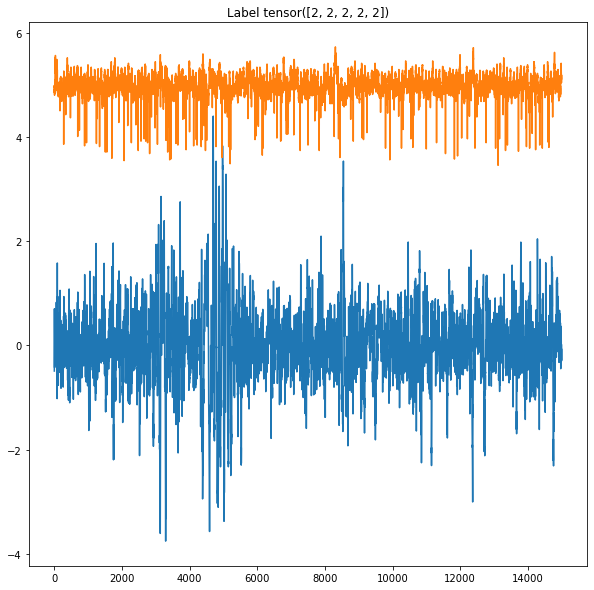

EEG batch shape: torch.Size([8, 1, 5, 3000])
EOG batch shape: torch.Size([8, 1, 5, 3000])
Labels batch shape: torch.Size([8, 5])


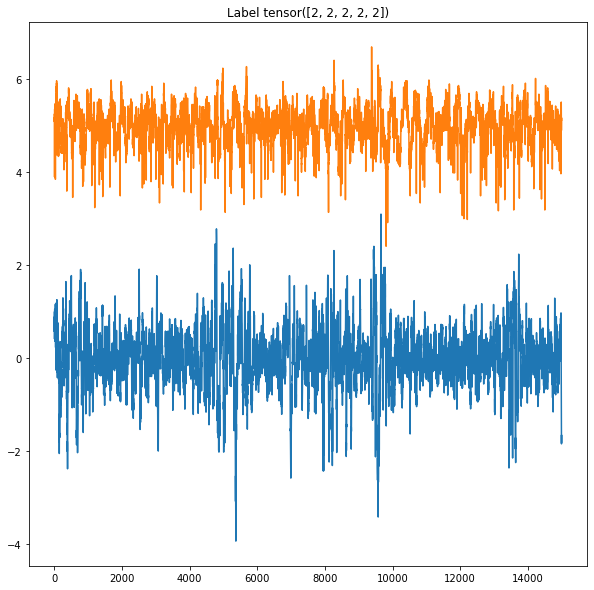

EEG Minimum :-7.16865294787065
EEG Maximum :8.752567039153805
EOG Minimum :-8.662216323035913
EOG Maximum :8.69009413953209
EEG Mean :-0.001596284507227166
EEG Standard Deviation :0.8237608708685435
EOG Mean :-0.0006302369468444693
EOG Standard Deviation :0.6388035075029015


In [9]:
eeg_data, eog_data, label = next(iter(train_data_loader))
print(f"EEG batch shape: {eeg_data.size()}")
print(f"EOG batch shape: {eog_data.size()}")
# print(f"EMG batch shape: {eeg2_data.size()}")
print(f"Labels batch shape: {label.size()}")

eeg_data_temp = torch.reshape(eeg_data[0],(1,eeg_data[0].shape[1]*eeg_data[0].shape[2]))
eog_data_temp = torch.reshape(eog_data[0],(1,eog_data[0].shape[1]*eog_data[0].shape[2]))

t = np.arange(0,30,1/100)
plt.figure(figsize = (10,10))
plt.plot(eeg_data_temp[0].squeeze())
plt.plot(eog_data_temp[0].squeeze()+5)
# plt.plot(t,eeg2_data[0].squeeze()+10)
plt.title(f"Label {label[0].squeeze()}")
plt.show()

eeg_data, eog_data, label = next(iter(val_data_loader))
print(f"EEG batch shape: {eeg_data.size()}")
print(f"EOG batch shape: {eog_data.size()}")
# print(f"EMG batch shape: {eeg2_data.size()}")
print(f"Labels batch shape: {label.size()}")

eeg_data_temp = torch.reshape(eeg_data[0],(1,eeg_data[0].shape[1]*eeg_data[0].shape[2]))
eog_data_temp = torch.reshape(eog_data[0],(1,eog_data[0].shape[1]*eog_data[0].shape[2]))

# t = np.arange(0,30,1/100)
plt.figure(figsize = (10,10))
plt.plot(eeg_data_temp[0].squeeze())
plt.plot(eog_data_temp[0].squeeze()+5)
# plt.plot(t,eeg2_data[0].squeeze()+10)
plt.title(f"Label {label[0].squeeze()}")
plt.show()


print(f"EEG Minimum :{eeg_data.min()}")
print(f"EEG Maximum :{eeg_data.max()}")
print(f"EOG Minimum :{eog_data.min()}")
print(f"EOG Maximum :{eog_data.max()}")
# print(f"EMG Minimum :{eeg2_data.min()}")
# print(f"EMG Maximum :{eeg2_data.max()}")


print(f"EEG Mean :{torch.mean(eeg_data)}")
print(f"EEG Standard Deviation :{torch.std(eeg_data)}")
print(f"EOG Mean :{torch.mean(eog_data)}")
print(f"EOG Standard Deviation :{torch.std(eog_data)}")
# print(f"EMG Mean :{torch.mean(eeg2_data)}")
# print(f"EMG Standard Deviation :{torch.std(eeg2_data)}")



### Classification Model Sequence Cross-Modal Transformer

In [10]:
import torch.optim as optim

d_model = 256 
dim_feedforward=1024  #
window_size = 50#25 50
Net = Seq_Cross_Transformer_Network(d_model = d_model, dim_feedforward=dim_feedforward,
                                window_size = window_size ).to(device)
# Net = torch.load('/home/jathu/fyp_g15_sleep_monitoring/Experiments/Sleep_edfx/V2_Seq_CMT/V2SEQ-32/checkpoint_model_best_kappa.pth.tar').to(device)

lr = 0.001#0.001
beta_1 =  0.9    
beta_2 =  0.999    
eps = 1e-9
n_epochs = 1000
weights = torch.tensor([1., 2., 1., 2., 2.]) 
print(f"weights: {weights}")
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(Net.parameters(), lr=lr, betas=(beta_1, beta_2),eps = eps, weight_decay = 0.0001)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.5) 

pred= Net(eeg_data.float().to(device), eog_data.float().to(device))
print(len(pred),pred[0].shape)#,cls_outs.shape,len(feat_list))

weights: tensor([1., 2., 1., 2., 2.])
5 torch.Size([8, 5])


In [11]:
if is_neptune:
    parameters = {
        "Experiment" : "Training test",
        'Model Type' : "Epoch Cross-Modal Transformer",
        'd_model' : d_model,
        'dim_feedforward' : dim_feedforward,
        'window_size ':window_size ,
        'Batch Size': batch_size,
        'Loss': f"Weighted Categorical Loss,{weights}", 
        'Optimizer' : "Adam",        # Check this every time   
        'Learning Rate': lr,
        'eps' : eps,
        "LR Schduler": "StepLR",
        'Beta 1': beta_1,
        'Beta 2': beta_2,
        'n_epochs': n_epochs,
        'val_set' : val_data_list[0]+1,
        'num seq': num_seq
    }
    
    run['model/parameters'] = parameters
    run['model/model_architecture'] = Net

### Training

In [12]:
# Training the model
best_val_acc = 0
best_val_kappa = 0
for epoch_idx in range(n_epochs):  # loop over the dataset multiple times
    if is_neptune:
        run['train/epoch/learning_Rate'].log(optimizer.param_groups[0]["lr"]) 
    Net.train()
    print(f'===========================================================Training Epoch : [{epoch_idx+1}/{n_epochs}] ===========================================================================================================>')
    batch_time = AverageMeter()
    data_time = AverageMeter()
    
    losses = AverageMeter()
    val_losses = AverageMeter()
    
    train_accuracy = AverageMeter()
    val_accuracy = AverageMeter()

    train_sensitivity = AverageMeter()
    val_sensitivity = AverageMeter()
    
    train_specificity = AverageMeter()
    val_specificity = AverageMeter()

    train_gmean = AverageMeter()
    val_gmean = AverageMeter()

    train_kappa = AverageMeter()
    val_kappa = AverageMeter()

    train_f1_score = AverageMeter()
    val_f1_score = AverageMeter()

    train_precision = AverageMeter()
    val_precision = AverageMeter()

    class1_sens = AverageMeter()
    class2_sens = AverageMeter()
    class3_sens = AverageMeter()
    class4_sens = AverageMeter()
    class5_sens = AverageMeter()

    class1_spec = AverageMeter()
    class2_spec = AverageMeter()
    class3_spec = AverageMeter()
    class4_spec = AverageMeter()
    class5_spec = AverageMeter()

    class1_f1 = AverageMeter()
    class2_f1 = AverageMeter()
    class3_f1 = AverageMeter()
    class4_f1 = AverageMeter()
    class5_f1 = AverageMeter()

    end = time.time()

    for batch_idx, data_input in enumerate(train_data_loader):
        # get the inputs; data is a list of [inputs, labels]
        data_time.update(time.time() - end)
        eeg,eog, labels = data_input
        cur_batch_size = len(eeg)
        optimizer.zero_grad()

        outputs = Net(eeg.float().to(device), eog.float().to(device))

        loss = 0
        for ep in range(num_seq):
          loss += criterion(outputs[ep].cpu(), labels[:,ep])


          train_accuracy.update(accuracy(outputs[ep].cpu(), labels[:,ep]))
          _,_,_,_,sens,spec,f1, prec = confusion_matrix(outputs[ep].cpu(), labels[:,ep], 5, cur_batch_size)
          train_sensitivity.update(sens)
          train_specificity.update(spec)
          train_f1_score.update(f1)
          train_precision.update(prec)
          train_gmean.update(g_mean(sens, spec))
          train_kappa.update(kappa(outputs[ep].cpu(), labels[:,ep]))
        
        loss.backward()
        optimizer.step()
        # scheduler.step()
        losses.update(loss)
        
        if is_neptune:
            run['train/epoch/batch_loss'].log(losses.val)     
            run['train/epoch/batch_accuracy'].log(train_accuracy.val)
        
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()


        if batch_idx % 1000 == 0:
            msg = 'Epoch: [{0}/{3}][{1}/{2}]\t' \
                  'Train_Loss {loss.val:.5f} ({loss.avg:.5f})\t'\
                  'Train_Acc {train_acc.val:.5f} ({train_acc.avg:.5f})\t'\
                  'Train_Kappa {train_kap.val:.5f}({train_kap.avg:.5f})\t'\
                  'Train_MF1 {train_mf1.val:.5f}({train_mf1.avg:.5f})\t'\
                  'Train_G-Mean {train_gmean.val:.5f}({train_gmean.avg:.5f})\t'\
                  'Train_Precision {train_prec.val:.5f}({train_prec.avg:.5f})\t'\
                  'Train_Sensitivity {train_sens.val:.5f}({train_sens.avg:.5f})\t'\
                  'Train_Specificity {train_spec.val:.5f}({train_spec.avg:.5f})\t'\
                  'Time {batch_time.val:.3f}s ({batch_time.avg:.3f}s)\t' \
                  'Speed {speed:.1f} samples/s\t' \
                  'Data {data_time.val:.3f}s ({data_time.avg:.3f}s)\t'.format(
                      epoch_idx+1, batch_idx, len(train_data_loader),n_epochs, batch_time=batch_time,
                      speed=data_input[0].size(0)/batch_time.val,
                      data_time=data_time, loss=losses, train_acc = train_accuracy,
                      train_sens =train_sensitivity, train_spec = train_specificity, train_gmean = train_gmean,
                      train_kap = train_kappa, train_mf1 = train_f1_score, train_prec = train_precision)
            
            print(msg)


    #evaluation
    with torch.no_grad():
      Net.eval()
      for batch_val_idx, data_val in enumerate(val_data_loader):
        val_eeg,val_eog, val_labels = data_val
        cur_val_batch_size = len(val_eeg)
        pred = Net(val_eeg.float().to(device), val_eog.float().to(device))
        
        val_loss = 0
        for ep in range(num_seq):
          val_loss += criterion(pred[ep].cpu(), val_labels[:,ep])

          val_accuracy.update(accuracy(pred[ep].cpu(), val_labels[:,ep]))
          sens_list,spec_list,f1_list,prec_list, sens,spec,f1,prec = confusion_matrix(pred[ep].cpu(), val_labels[:,ep],  5, cur_val_batch_size)
          val_sensitivity.update(sens)
          val_specificity.update(spec)
          val_f1_score.update(f1)
          val_precision.update(prec)
          val_gmean.update(g_mean(sens, spec))
          val_kappa.update(kappa(pred[ep].cpu(), val_labels[:,ep]))

          class1_sens.update(sens_list[0])
          class2_sens.update(sens_list[1])
          class3_sens.update(sens_list[2])
          class4_sens.update(sens_list[3])
          class5_sens.update(sens_list[4])

          class1_spec.update(spec_list[0])
          class2_spec.update(spec_list[1])
          class3_spec.update(spec_list[2])
          class4_spec.update(spec_list[3])
          class5_spec.update(spec_list[4])

          class1_f1.update(f1_list[0])
          class2_f1.update(f1_list[1])
          class3_f1.update(f1_list[2])
          class4_f1.update(f1_list[3])
          class5_f1.update(f1_list[4])

        
        val_losses.update(val_loss)#.data.item())
        

      print(batch_val_idx)

     

      print(f'===========================================================Epoch : [{epoch_idx+1}/{n_epochs}]  Evaluation ===========================================================================================================>')
      print("Training Results : ")
      print(f"Training Loss     : {losses.avg}, Training Accuracy      : {train_accuracy.avg}, Training G-Mean      : {train_gmean.avg}") 
      print(f"Training Kappa      : {train_kappa.avg},Training MF1     : {train_f1_score.avg}, Training Precision      : {train_precision.avg}, Training Sensitivity      : {train_sensitivity.avg}, Training Specificity      : {train_specificity.avg}")
      
      print("Validation Results : ")
      print(f"Validation Loss   : {val_losses.avg}, Validation Accuracy : {val_accuracy.avg}, Validation G-Mean      : {val_gmean.avg}") 
      print(f"Validation Kappa     : {val_kappa.avg}, Validation MF1      : {val_f1_score.avg}, Validation Precision      : {val_precision.avg},  Validation Sensitivity      : {val_sensitivity.avg}, Validation Specificity      : {val_specificity.avg}")
    

      print(f"Class wise sensitivity W: {class1_sens.avg}, S1: {class2_sens.avg}, S2: {class3_sens.avg}, S3: {class4_sens.avg}, R: {class5_sens.avg}")
      print(f"Class wise specificity W: {class1_spec.avg}, S1: {class2_spec.avg}, S2: {class3_spec.avg}, S3: {class4_spec.avg}, R: {class5_spec.avg}")
      print(f"Class wise F1  W: {class1_f1.avg}, S1: {class2_f1.avg}, S2: {class3_f1.avg}, S3: {class4_f1.avg}, R: {class5_f1.avg}")

      if is_neptune:
          run['train/epoch/epoch_train_loss'].log(losses.avg)
          run['train/epoch/epoch_val_loss'].log(val_losses.avg)

          run['train/epoch/epoch_train_accuracy'].log(train_accuracy.avg)
          run['train/epoch/epoch_val_accuracy'].log(val_accuracy.avg)

          run['train/epoch/epoch_train_sensitivity'].log(train_sensitivity.avg)
          run['train/epoch/epoch_val_sensitivity'].log(val_sensitivity.avg)

          run['train/epoch/epoch_train_specificity'].log(train_specificity.avg)
          run['train/epoch/epoch_val_specificity'].log(val_specificity.avg)

          run['train/epoch/epoch_train_G-Mean'].log(train_gmean.avg)
          run['train/epoch/epoch_val_G-Mean'].log(val_gmean.avg)

          run['train/epoch/epoch_train_Kappa'].log(train_kappa.avg)
          run['train/epoch/epoch_val_Kappa'].log(val_kappa.avg)

          run['train/epoch/epoch_train_MF1 Score'].log(train_f1_score.avg)
          run['train/epoch/epoch_val_MF1 Score'].log(val_f1_score.avg)

          run['train/epoch/epoch_train_Precision'].log(train_precision.avg)
          run['train/epoch/epoch_val_Precision'].log(val_precision.avg)

          #################################

          run['train/epoch/epoch_val_Class wise sensitivity W'].log(class1_sens.avg)
          run['train/epoch/epoch_val_Class wise sensitivity S1'].log(class2_sens.avg)
          run['train/epoch/epoch_val_Class wise sensitivity S2'].log(class3_sens.avg)
          run['train/epoch/epoch_val_Class wise sensitivity S3'].log(class4_sens.avg)
          run['train/epoch/epoch_val_Class wise sensitivity R'].log(class5_sens.avg)

          run['train/epoch/epoch_val_Class wise specificity W'].log(class1_spec.avg)
          run['train/epoch/epoch_val_Class wise specificity S1'].log(class2_spec.avg)
          run['train/epoch/epoch_val_Class wise specificity S2'].log(class3_spec.avg)
          run['train/epoch/epoch_val_Class wise specificity S3'].log(class4_spec.avg)
          run['train/epoch/epoch_val_Class wise specificity R'].log(class5_spec.avg)

          run['train/epoch/epoch_val_Class wise F1 Score W'].log(class1_f1.avg)
          run['train/epoch/epoch_val_Class wise F1 Score S1'].log(class2_f1.avg)
          run['train/epoch/epoch_val_Class wise F1 Score S2'].log(class3_f1.avg)
          run['train/epoch/epoch_val_Class wise F1 Score S3'].log(class4_f1.avg)
          run['train/epoch/epoch_val_Class wise F1 Score R'].log(class5_f1.avg)

      if val_accuracy.avg > best_val_acc or (epoch_idx+1)%100==0 or val_kappa.avg > best_val_kappa:
          if val_accuracy.avg > best_val_acc:
            run['model/bestmodel_acc'].log(epoch_idx+1)
            best_val_acc = val_accuracy.avg
            print("================================================================================================")
            print("                                          Saving Best Model (ACC)                                     ")
            print("================================================================================================")
            torch.save(Net, f'{project_path}/checkpoint_model_best_acc.pth.tar')
          if val_kappa.avg > best_val_kappa:
            run['model/bestmodel_kappa'].log(epoch_idx+1)
            best_val_kappa = val_kappa.avg
            print("================================================================================================")
            print("                                          Saving Best Model (Kappa)                                    ")
            print("================================================================================================")
            torch.save(Net, f'{project_path}/checkpoint_model_best_kappa.pth.tar')
          if (epoch_idx+1)%50==0:
            torch.save(Net, f'{project_path}/checkpoint_model_epoch_{epoch_idx+1}.pth.tar')
    lr_scheduler.step()
print('========================================Finished Training ===========================================')

===========================================================Training Epoch : [1/1000] ===========================================================================================================>


/home/jovyan/work/Cross-Modal-Transformer/utils/metrics.py:136: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272155627/work/aten/src/ATen/native/IndexingUtils.h:30.)
  FP = conf_matrix[c, idx].sum()
/home/jovyan/work/Cross-Modal-Transformer/utils/metrics.py:137: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272155627/work/aten/src/ATen/native/IndexingUtils.h:30.)
  FN = conf_matrix[idx, c].sum()


Epoch: [1/1000][0/19961]	Train_Loss 8.05284 (8.05284)	Train_Acc 0.12500 (0.32500)	Train_Kappa -0.07692(0.04744)	Train_MF1 0.05714(0.12106)	Train_G-Mean 0.22804(0.38173)	Train_Precision 0.05000(0.09733)	Train_Sensitivity 0.06667(0.18667)	Train_Specificity 0.78000(0.81033)	Time 0.342s (0.342s)	Speed 23.4 samples/s	Data 0.049s (0.049s)	
Epoch: [1/1000][1000/19961]	Train_Loss 7.21841 (6.65465)	Train_Acc 0.37500 (0.51633)	Train_Kappa 0.20000(0.32354)	Train_MF1 0.23333(0.29159)	Train_G-Mean 0.57900(0.52855)	Train_Precision 0.16667(0.30360)	Train_Sensitivity 0.40000(0.33395)	Train_Specificity 0.83810(0.87263)	Time 0.164s (0.169s)	Speed 48.7 samples/s	Data 0.011s (0.012s)	
Epoch: [1/1000][2000/19961]	Train_Loss 5.26556 (6.53659)	Train_Acc 0.62500 (0.52867)	Train_Kappa 0.33333(0.33593)	Train_MF1 0.24000(0.29989)	Train_G-Mean 0.46771(0.53484)	Train_Precision 0.33333(0.31222)	Train_Sensitivity 0.25000(0.33993)	Train_Specificity 0.87500(0.87502)	Time 0.167s (0.170s)	Speed 47.8 samples/s	Data 0.020

KeyboardInterrupt: 